### <font color='RED' size= 5 ><b> "JUPYTER NOTEBOOK- AIRLINE NYC DATASET ANALYSIS"</b></font>


### Importing Packages


In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pds
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure,show,output_notebook
from matplotlib import style
import sklearn as skl

### <font color ='black'><b> Coverting the Time data and slicing it for better representation if required : Optional</b></font>

In [2]:
def convert (number):
        if ((len(str(number))>3)):
            return str(number)[0:2] + str(number)[2:]
        else:
            return "0" + str(number)[:1]+str(number)[1:]

### <font color ='black'><b> " Reading the Dataset, Profiling the dataset and removing Null data "</b></font>


In [3]:
flight_data=pd.read_csv("D:/BigDataProjects/DataScience/Upx/Project/ProjectDatasets/Project_1_NYC-Flight_data/Project_1_NYC-Flightdata/flight_data.csv")
report= pds.ProfileReport(flight_data)
report.to_file("D:/BigDataProjects/DataScience/Upx/Project/ProjectDatasets/Project_1_NYC-Flight_data/Project_1_NYC-Flightdata/Flightdata_info.html")
dataset_f=pd.DataFrame(flight_data)
dataset_f= dataset_f.dropna()
print("The total number of rows and column in dataset after removing null value is", dataset_f.shape)

The total number of rows and column in dataset after removing null value is (327346, 19)


### <font color='red'><b> Problem Statement 1 : "Departure Delays"</b></font>

### 1. Finding out which day have highest delay departure


In [4]:
day_delay=dataset_f.groupby(['day','month'], as_index=False).agg({'dep_delay': 'mean'})
day_delay_max=day_delay['dep_delay'].max()
day_delay_info=day_delay[day_delay['dep_delay']==day_delay_max]
print(day_delay_info)

    day  month  dep_delay
86    8      3   83.64787


### 2 Which day have maximum number of flight delay- i.e. which day appear to worst in term of departure delay


In [5]:
max_flightdealy_day=dataset_f[dataset_f['dep_delay'] > 0].groupby(['day','month'], as_index=False).agg({'flight': 'count'})
max_flightdealy_info = max_flightdealy_day[max_flightdealy_day['flight'].max() == max_flightdealy_day['flight']]
print("Day and month which have maximum number of flight delay" '\n' ,max_flightdealy_info)

Day and month which have maximum number of flight delay
      day  month  flight
275   23     12     673


### 3. Monthwise Average delay departure information of flight from NYC to all destination


In [6]:
month_delayinfo = dataset_f.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
month_delayinfo['dep_delay']=np.round(month_delayinfo['dep_delay'],0)
sn.factorplot(x='month', y='dep_delay', data=month_delayinfo, kind='bar')
plt.savefig("D:/fig1")
plt.plot()
plt.show()


C:\Users\Mowgli\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


### <font color='red'><b> Problem Statement 2 : "Best Airport in term of time Departure in terms of %"</b></font>

### Obtaining "Origin" where departure delay is less and "Destination" where arrival delay is less

In [7]:
airport_info_df=pd.DataFrame(dataset_f,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_info1=airport_info_df[airport_info_df['dep_delay']<1]
best_airport=airport_info1.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar', title ="Best Airport in term of departure",figsize=(5,5),legend=True, fontsize=12)
plt.savefig("D:/fig2")
plt.show()
plt.close()

### <font color='red'><b> Problem Statement 3 :"Aircraft Speed Analysis"</b></font>

### 1. Finding out the top 5 fastest flight details from NYC

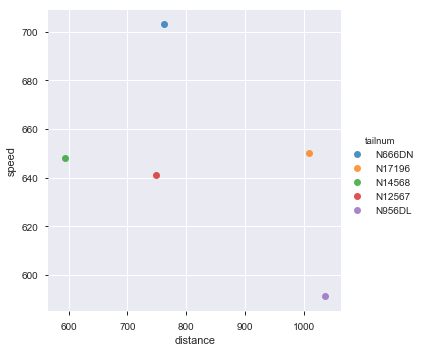

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
216447,2013,5,25,1709.0,1700,9.0,1923.0,1937,-14.0,DL,1499,N666DN,LGA,ATL,65.0,762,17,0,25-05-2013 17:00,703.4
251999,2013,7,2,1558.0,1513,45.0,1745.0,1719,26.0,EV,4667,N17196,EWR,MSP,93.0,1008,15,13,2/7/2013 15:00,650.3
205388,2013,5,13,2040.0,2025,15.0,2225.0,2226,-1.0,EV,4292,N14568,EWR,GSP,55.0,594,20,25,13-05-2013 20:00,648.0
157516,2013,3,23,1914.0,1910,4.0,2045.0,2043,2.0,EV,3805,N12567,EWR,BNA,70.0,748,19,10,23-03-2013 19:00,641.1
10223,2013,1,12,1559.0,1600,-1.0,1849.0,1917,-28.0,DL,1902,N956DL,LGA,PBI,105.0,1035,16,0,12/1/2013 16:00,591.4


In [8]:
%matplotlib inline

dataset_f['speed']=dataset_f['distance']/(dataset_f['air_time']/60)
fastest_flight_max=dataset_f.sort_values(['speed'], ascending=False)
fastest_flight_max['speed']=np.round(fastest_flight_max['speed'],1)
fastest_flight_max_top5=fastest_flight_max.head(5)
sn.lmplot(x = 'distance', y='speed', data = fastest_flight_max_top5,fit_reg=False, hue="tailnum")
plt.savefig("D:/fig3")
plt.show()
fastest_flight_max_top5

### <font color='red'><b> Problem Statement 3 : "On time arrival % analysis."</b></font>

### 1. Top 5 destination where flight arrives early than expected arrival time

In [9]:
carrier_info=dataset_f['carrier'].unique()


early_arrival=dataset_f[dataset_f['arr_delay']<=0]
top5carrier_info=(early_arrival.sort_values(['arr_delay'], ascending=True)).head(5)
top5carrier_info_details=pd.DataFrame(top5carrier_info, columns=['day','month','origin','dest','arr_delay','carrier','flight','tailnum','distance','speed'])
print("The details of top 5 flight info which arrives on destination",'\n')
for i in range(5):
    print("The flight from {}".format(top5carrier_info_details['origin'].iloc[i:]))
#plt.plot(top5carrier_info_details.dest,top5carrier_info_details.arr_delay,linestyle='--', color='red')
#plt.grid(True, color='k')
#plt.savefig("D:/fig4")
#plt.show()

#carrier_arrival=early_arrival.sort_values(['arr_delay'], ascending=True).groupby(['month'],as_index=False).agg({'arr_delay':'mean'})
#sn.factorplot(x='month', y='arr_delay', data=carrier_arrival)
#plt.xticks(rotation=75)
#plt.grid(True, color='b')
#plt.legend
#plt.savefig("D:/fig5")


The details of top 5 flight info which arrives on destination 

The flight from 199668    EWR
211124    JFK
198763    JFK
195236    EWR
196935    EWR
Name: origin, dtype: object
The flight from 211124    JFK
198763    JFK
195236    EWR
196935    EWR
Name: origin, dtype: object
The flight from 198763    JFK
195236    EWR
196935    EWR
Name: origin, dtype: object
The flight from 195236    EWR
196935    EWR
Name: origin, dtype: object
The flight from 196935    EWR
Name: origin, dtype: object


### <font color='red'><b> Problem Statement 4 : "Maximum number of flights headed to some particular destination"</b></font>

### 1. Finding the unique flights flied from NYC i.e(from JFK, LGA and EWR) to all destination in 2013

In [10]:
%matplotlib inline
NYC_allflight=dataset_f['dest'].unique()


NYC_allflightcount=len(NYC_allflight)
print("The total number unique destination flight  from NYC is"+ "::" ,NYC_allflightcount)
print('\n')

originwise_flight=dataset_f.groupby(['origin'])["dest"].count()
print("The following are the total count of destination flight from the following origion\n",originwise_flight)


The total number unique destination flight  from NYC is:: 104


The following are the total count of destination flight from the following origion
 origin
EWR    117127
JFK    109079
LGA    101140
Name: dest, dtype: int64


### The top 5 Spot destination flight from NYC on month basis count)

The top 5 Spot destination flight from NYC is


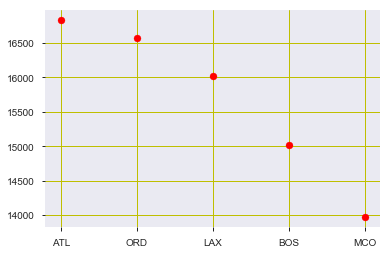

,dest,month
4,ATL,16837
68,ORD,16566
49,LAX,16026
11,BOS,15022
53,MCO,13967


In [11]:
NYC_allflight1=dataset_f.groupby(['dest'],as_index=False).agg({'month':'count'})
maximun_count_flight=NYC_allflight1.sort_values(['month'], ascending=False)
print("The top 5 Spot destination flight from NYC is")
top_destination_flight = maximun_count_flight.head(5)
plt.scatter(top_destination_flight.dest,top_destination_flight.month, color='red')
plt.legend
plt.savefig("D:/fig6")
plt.grid(True, color='y')
plt.show()
top_destination_flight


### To find, the total number of unique Airline  headed to 'ATL‘(found destination which max no of flight from NYC)’

In [12]:
ATL_dest=dataset_f[dataset_f['dest']=='ATL']
Airline_count=(ATL_dest['carrier']).unique()
print("The total number of Airline  headed to 'ATL' from NYC is",len(Airline_count))
print('\n')


The total number of Airline  headed to 'ATL' from NYC is 7




#### To find, the total number of unique flights  headed to 'ATL‘(found destination which max no of flight from NYC)’


In [13]:
flight_ATL_dest_count=ATL_dest['tailnum'].unique()
print("The total unique flight  headed to 'ATL' from NYC is",len(flight_ATL_dest_count))
print('\n')

The total unique flight  headed to 'ATL' from NYC is 1178




### Visual Respresentation from Origin to dest and Finding the all Posible route from source to destination

In [14]:
import networkx as nx
df= nx.from_pandas_edgelist(dataset_f, source='origin', target='dest',edge_attr=True)
df.node()

NodeView(('EWR', 'IAH', 'LGA', 'JFK', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI', 'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW', 'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC', 'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX', 'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC', 'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL', 'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL', 'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI', 'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF', 'TYS', 'PVD', 'DSM', 'PSE', 'TUL', 'BHM', 'OKC', 'CAE', 'HDN', 'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY', 'SBN', 'LEX', 'CHO', 'TVC', 'ANC'))

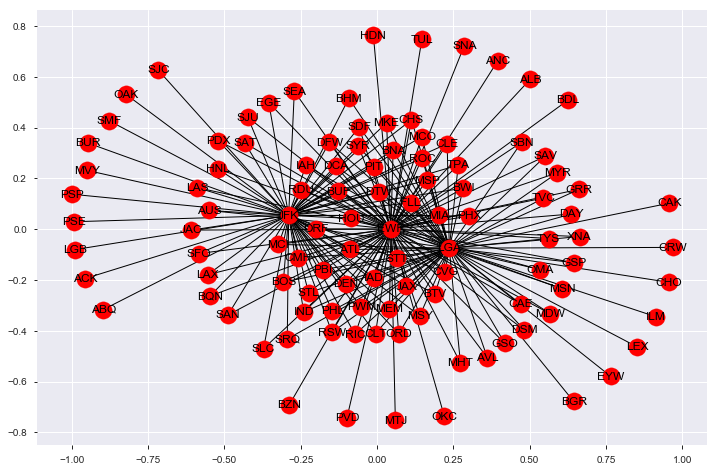

In [15]:
%matplotlib inline
plt.figure(figsize=(12,8))
nx.draw_networkx(df,with_label=True)

### Shortest Path from origin: 'EWR' to destination :'EYW'

['EWR', 'PHL', 'LGA', 'EYW']


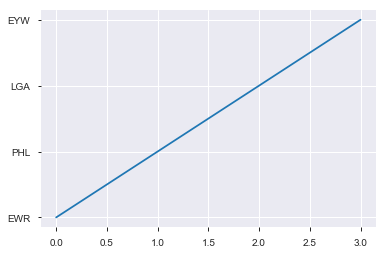

In [16]:
shortest_path= nx.dijkstra_path(df,source='EWR', target='EYW',weight='distance')
print(shortest_path)
plt.plot(shortest_path)

### Thank You********************************

In [20]:
import os
os.getcwd()


'C:\\Users\\Mowgli'